# 🌿 Green Potential Analysis Notebook

# User selection
## kernel type
    polytope to use the pre-exisiting kernel - will not allow for interactive sliders
    urbanair to use more interactive tools


In [1]:
import logging
import os
# for k in ["PROJ_LIB", "PROJ_DATA", "GDAL_DATA", "PYPROJ_GLOBAL_CONTEXT"]:
#     os.environ.pop(k, None)
# # --- point to the correct data dirs of your env (/home/jovyan/conda/urbanair) ---
# proj_dir = "/home/jovyan/conda/urbanair/share/proj"
# gdal_dir = "/home/jovyan/conda/urbanair/share/gdal"
# os.environ["PROJ_LIB"] = proj_dir
# os.environ["GDAL_DATA"] = gdal_dir
# from pyproj import datadir
# datadir.set_data_dir(proj_dir)   # ensures pyproj uses this proj.db
import rasterio
from pathlib import Path
from src.plots_jupyter import plot_green_potential
from src.green_pont import (
        load_json_with_comments,
        antwerp_green_map,
        create_green_map,
        plot_green_map,
        create_special_green_map,
    )
CONFIG_FILE = 'etc/settings_greenPotential.json'
cf = load_json_with_comments(CONFIG_FILE)

kernel="urbanair" # options are urbanair or polytope 


In [2]:
# Define sliders
if kernel == "urbanair":
    import ipywidgets as widgets
    from IPython.display import display
    slider1 = widgets.FloatSlider(
        value=1, min=0, max=2, step=0.01,
        description='Air quality:', continuous_update=True
    )
    slider2 = widgets.FloatSlider(
        value=1, min=0, max=2, step=0.01,
        description='Wind Comfort:', continuous_update=True
    )
    slider3 = widgets.FloatSlider(
        value=1, min=0, max=2, step=0.01,
        description='Heat stress:', continuous_update=True
    )
    
    # Display all three
    display(slider1, slider2, slider3)
    w_aq=slider1.value
    w_wc=slider2.value
    w_heat=slider3.value

elif kernel == "polytope":

    w_aq=1 # user defined air quality weight on urban green 
    w_wc=1  # user defined wind comfort weight on urban green
    w_heat=1 # user defined heat stress weight on urban green

else:
    print("unknown kernel")


FloatSlider(value=1.0, description='Air quality:', max=2.0, step=0.01)

FloatSlider(value=1.0, description='Wind Comfort:', max=2.0, step=0.01)

FloatSlider(value=1.0, description='Heat stress:', max=2.0, step=0.01)

In [3]:
create_green_map(cf, method=3, aq_weight=w_aq, comfort_weight=w_wc, heat_weight=w_heat)

Attempting to find S3 file: s3.central.data.destination-earth.eu/maps/wind_comfort_resampled.tif
Attempting to find S3 file: s3.central.data.destination-earth.eu/maps/wbgt_max_resampled.tif
Attempting to open S3 file: s3.central.data.destination-earth.eu/average-maps/AQ_merge_0_175.tiff in mode: rb
Attempting to open S3 file: s3.central.data.destination-earth.eu/maps/wind_comfort_resampled.tif in mode: rb
Attempting to open S3 file: s3.central.data.destination-earth.eu/maps/wbgt_max_resampled.tif in mode: rb
Attempting to open S3 file: s3.central.data.destination-earth.eu/maps/recomendation_method3.tif in mode: wb
Attempting to open S3 file: s3.central.data.destination-earth.eu/maps/recomendation_method3.tif in mode: rb
Attempting to open S3 file: s3.central.data.destination-earth.eu/maps/recomendation_method3_4326.tif in mode: wb
Attempting to open S3 file: s3.central.data.destination-earth.eu/buildings/bld_all_fused.zip in mode: rb
Attempting to open S3 file: s3.central.data.destinat

Attempting to open S3 file: s3.central.data.destination-earth.eu/maps/recomendation_method3_4326.tif in mode: rb


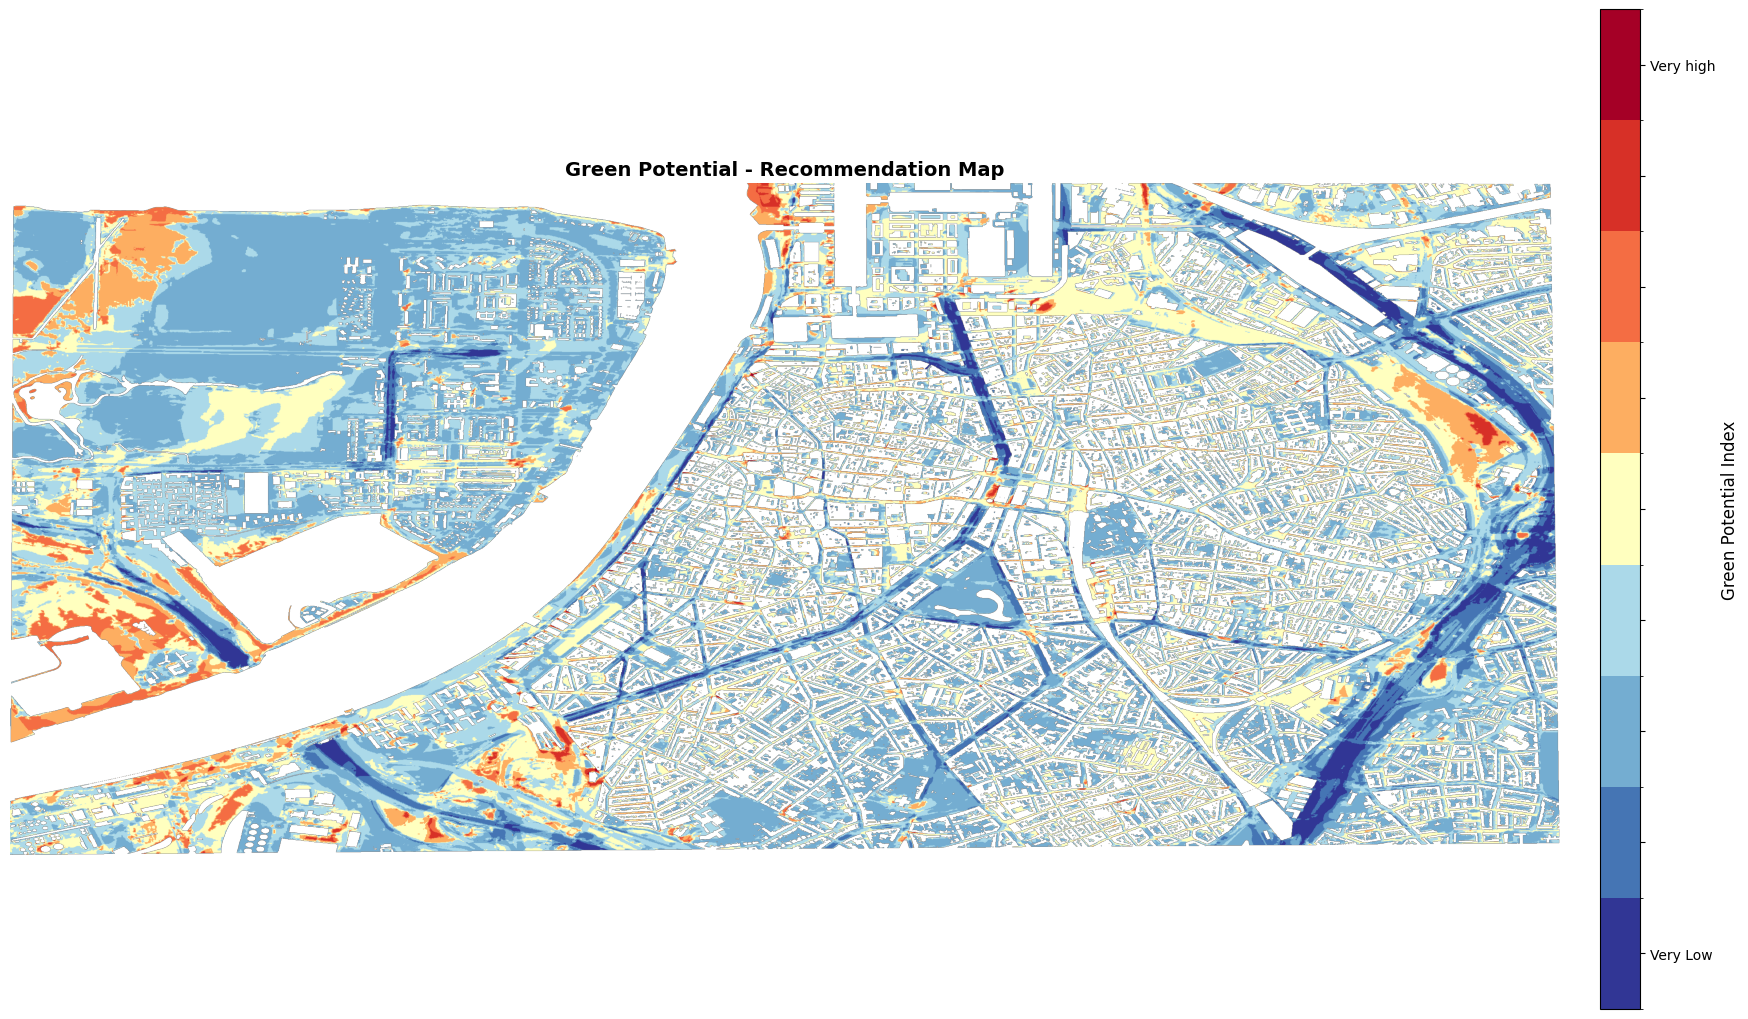

In [4]:
plot_green_potential(cf,static=True)